In [1]:
import pandas as pd

df = pd.read_csv('cars.csv')

df.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Price
0,Mercedes-Benz,sedan,68,6.0,Petrol,yes,2011,S 600,300000.0
1,Mercedes-Benz,other,37,5.0,Petrol,yes,2012,G 500,300000.0
2,Mercedes-Benz,sedan,29,6.0,Petrol,yes,2011,S-Guard,295000.0
3,Mercedes-Benz,sedan,29,6.0,Petrol,yes,2011,S 600,295000.0
4,Mercedes-Benz,other,6,5.5,Petrol,yes,2016,S 63 AMG,250000.0


In [2]:
from sklearn.preprocessing import LabelEncoder

le_Brand = LabelEncoder()
le_Brand.fit(df['Brand'])

le_Body = LabelEncoder()
le_Body.fit(df['Body'])

le_Engine_Type = LabelEncoder()
le_Engine_Type.fit(df['Engine Type'])

le_Registration = LabelEncoder()
le_Registration.fit(df['Registration'])

le_Model = LabelEncoder()
le_Model.fit(df['Model'])

df['brand_num'] = le_Brand.transform(df['Brand'])
df['body_num'] = le_Body.transform(df['Body'])
df['engine_Type_num'] = le_Engine_Type.transform(df['Engine Type'])
df['registration_num'] = le_Registration.transform(df['Registration'])
df['model_num'] = le_Model.transform(df['Model'])

df = df.drop(columns= ['Brand', 'Body', 'Engine Type', 'Registration', 'Model'])

df.head()

,Mileage,EngineV,Year,Price,brand_num,body_num,engine_Type_num,registration_num,model_num
0,68,6.0,2011,300000.0,2,3,3,1,239
1,37,5.0,2012,300000.0,2,2,3,1,127
2,29,6.0,2011,295000.0,2,3,3,1,242
3,29,6.0,2011,295000.0,2,3,3,1,239
4,6,5.5,2016,250000.0,2,2,3,1,240


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4173 entries, 0 to 4172
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Mileage           4173 non-null   int64  
 1   EngineV           4025 non-null   float64
 2   Year              4173 non-null   int64  
 3   Price             4173 non-null   float64
 4   brand_num         4173 non-null   int32  
 5   body_num          4173 non-null   int32  
 6   engine_Type_num   4173 non-null   int32  
 7   registration_num  4173 non-null   int32  
 8   model_num         4173 non-null   int32  
dtypes: float64(2), int32(5), int64(2)
memory usage: 212.0 KB


In [4]:
#df['EngineV'] = df['EngineV'].fillna(value= df['EngineV'].mean(), inplace= True)

In [5]:
#df.fillna({'EngineV': df['EngineV'].mean()}, inplace=True)

In [6]:
mean_engine_v = df['EngineV'].mean()
df.fillna({'EngineV': mean_engine_v}, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4173 entries, 0 to 4172
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Mileage           4173 non-null   int64  
 1   EngineV           4173 non-null   float64
 2   Year              4173 non-null   int64  
 3   Price             4173 non-null   float64
 4   brand_num         4173 non-null   int32  
 5   body_num          4173 non-null   int32  
 6   engine_Type_num   4173 non-null   int32  
 7   registration_num  4173 non-null   int32  
 8   model_num         4173 non-null   int32  
dtypes: float64(2), int32(5), int64(2)
memory usage: 212.0 KB


In [8]:
df.describe()

,Mileage,EngineV,Year,Price,brand_num,body_num,engine_Type_num,registration_num,model_num
count,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000
mean,164.141625,2.762127,2006.365684,19218.579430,3.171340,2.562425,1.301941,0.905584,163.211598
std,104.763054,4.846869,6.685332,24625.021129,2.084648,1.642627,1.359738,0.292442,86.903844
min,0.000000,0.600000,1969.000000,600.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.000000,1.900000,2003.000000,6999.000000,1.000000,1.000000,0.000000,1.000000,98.000000
50%,158.000000,2.200000,2007.000000,11500.000000,3.000000,3.000000,1.000000,1.000000,162.000000
75%,230.000000,3.000000,2012.000000,21700.000000,5.000000,3.000000,3.000000,1.000000,226.000000
max,980.000000,99.990000,2016.000000,300000.000000,6.000000,5.000000,3.000000,1.000000,305.000000


In [9]:
df.columns

Index(['Mileage', 'EngineV', 'Year', 'Price', 'brand_num', 'body_num',
       'engine_Type_num', 'registration_num', 'model_num'],
      dtype='object')

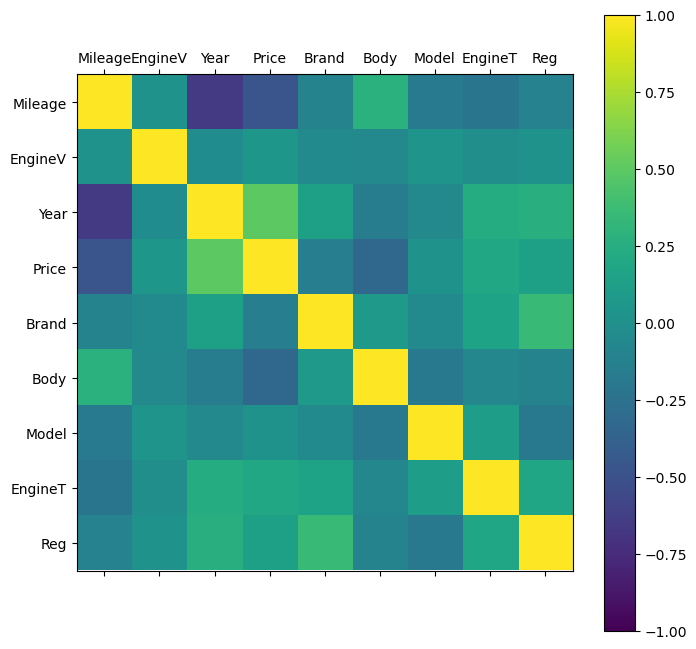

In [10]:
import matplotlib.pyplot as plt

correlations = df.corr(method='pearson')
 
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(1,1,1)

cax = ax.matshow(correlations, vmin=-1, vmax=1)

fig.colorbar(cax)

ticks = [0,1,2,3,4,5,6,7,8]

ax.set_xticks(ticks)
ax.set_yticks(ticks)

ax.set_xticklabels(["Mileage","EngineV","Year","Price","Brand","Body","Model","EngineT","Reg"])
ax.set_yticklabels(["Mileage","EngineV","Year","Price","Brand","Body","Model","EngineT","Reg"])

plt.show()

In [11]:
correlations

,Mileage,EngineV,Year,Price,brand_num,body_num,engine_Type_num,registration_num,model_num
Mileage,1.000000,0.024997,-0.657209,-0.470972,-0.103632,0.274665,-0.181472,-0.220995,-0.114445
EngineV,0.024997,1.000000,-0.030531,0.055153,-0.051471,-0.054943,0.035441,-0.010762,0.028124
Year,-0.657209,-0.030531,1.000000,0.496099,0.137325,-0.161307,-0.055630,0.241410,0.263233
Price,-0.470972,0.055153,0.496099,1.000000,-0.147791,-0.320825,0.019553,0.196637,0.132988
brand_num,-0.103632,-0.051471,0.137325,-0.147791,1.000000,0.082238,-0.047175,0.161793,0.346050
body_num,0.274665,-0.054943,-0.161307,-0.320825,0.082238,1.000000,-0.195062,-0.073551,-0.102613
engine_Type_num,-0.181472,0.035441,-0.055630,0.019553,-0.047175,-0.195062,1.000000,0.124755,-0.190153
registration_num,-0.220995,-0.010762,0.241410,0.196637,0.161793,-0.073551,0.124755,1.000000,0.178531
model_num,-0.114445,0.028124,0.263233,0.132988,0.346050,-0.102613,-0.190153,0.178531,1.000000


<Axes: >

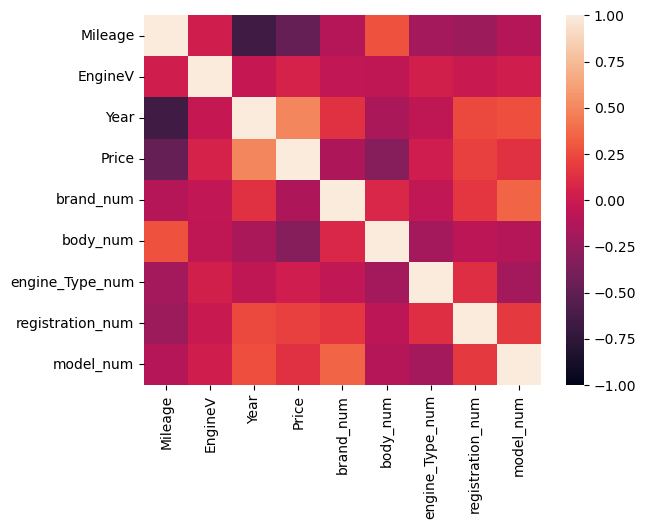

In [12]:
import seaborn as sns

sns.heatmap(correlations, vmin= -1, vmax= 1)

In [13]:
x = df[['Mileage','Year', 'brand_num', 'body_num']]
y = df['Price']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y)

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train.values, y_train)

print('intersipte = ', model.intercept_)
print('coffisiont = ', model.coef_)

intersipte =  -2567266.798300014
coffisiont =  [  -42.46568602  1299.81528337 -2336.78045731 -2860.32306591]


In [14]:
y_pred = model.predict(x_test.values)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

print('mae = ', mean_absolute_error(y_test, y_pred))
print('rmse = ', sqrt(mean_absolute_error(y_test, y_pred)))
print('mse = ', mean_squared_error(y_test, y_pred))


mae =  11718.435685104647
rmse =  108.25172370500457
mse =  523046617.7414444


In [17]:
mileage = 200
year = 2024
brand = 'Toyota'
body = 'sedan'

brand_num = le_Brand.transform([brand])[0]
body_num = le_Body.transform([body])[0]

ex = [[mileage, year, brand_num, body_num]]


pred = model.predict(ex)
print('prediction = ', pred[0])


prediction =  34801.32656000415


In [20]:
y_pred = model.intercept_ + model.coef_[0] * mileage + model.coef_[1] * year + model.coef_[2] * brand_num + model.coef_[3] * body_num
y_pred

34801.32656000392